# Based on car collision data in California for years 2019-2020, get an estimate of when the pandemic started

In [1]:
import pandas as pd

In [2]:
#Reading the data into a dataframe
#Note-data source not on GitHub

car_collisions=pd.read_csv("Downloads/datascience_interview_data/california_car_collisions.csv",low_memory=False)

In [3]:
#viewing the dataframe
car_collisions.head(5)

,case_id,jurisdiction,officer_id,reporting_district,chp_shift,population,county_city_location,special_condition,beat_type,chp_beat_type,...,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,primary_ramp,secondary_ramp,latitude,longitude,collision_date,collision_time,process_date
0,81715,1941.0,11342,212,5,7,1941.0,0.0,0.0,not chp,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2020-03-14,07:45:00,2020-06-22
1,726202,3600.0,8945,064,5,5,3612.0,0.0,0.0,not chp,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2020-07-26,02:50:00,2020-09-30
2,8008498,3604.0,975,NaN,5,6,3604.0,0.0,0.0,not chp,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2019-05-14,09:41:00,2019-06-04
3,8008502,3000.0,5163,951J2,5,5,3040.0,0.0,0.0,not chp,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2019-04-30,20:06:00,2019-07-10
4,8008506,1942.0,27792,1541,5,7,1942.0,0.0,0.0,not chp,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,2019-05-29,09:30:00,2019-08-16


In [4]:
#Dataframe information
car_collisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577859 entries, 0 to 577858
Data columns (total 74 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   case_id                          577859 non-null  int64  
 1   jurisdiction                     576588 non-null  float64
 2   officer_id                       577257 non-null  object 
 3   reporting_district               227895 non-null  object 
 4   chp_shift                        577859 non-null  int64  
 5   population                       577859 non-null  int64  
 6   county_city_location             577858 non-null  float64
 7   special_condition                577858 non-null  float64
 8   beat_type                        577858 non-null  float64
 9   chp_beat_type                    577858 non-null  object 
 10  city_division_lapd               40545 non-null   object 
 11  chp_beat_class                   577858 non-null  object 
 12  be

In [5]:
#Consider collision_date column-
#Estimation is that the pandemic started approximately around the time there was a sharpp decline in collision reports

car_collisions['collision_date']


0         2020-03-14
1         2020-07-26
2         2019-05-14
3         2019-04-30
4         2019-05-29
             ...    
577854    2020-02-23
577855    2020-02-24
577856    2020-02-23
577857    2020-02-27
577858           NaN
Name: collision_date, Length: 577859, dtype: object

In [6]:
#Consider rows which don't have null values
new_collision_data=car_collisions[car_collisions['collision_date'].notna()]

In [7]:
#View dataframe without null values in the collision_date column
new_collision_data

,case_id,jurisdiction,officer_id,reporting_district,chp_shift,population,county_city_location,special_condition,beat_type,chp_beat_type,...,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,primary_ramp,secondary_ramp,latitude,longitude,collision_date,collision_time,process_date
0,81715,1941.0,11342,212,5,7,1941.0,0.0,0.0,not chp,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2020-03-14,07:45:00,2020-06-22
1,726202,3600.0,8945,064,5,5,3612.0,0.0,0.0,not chp,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2020-07-26,02:50:00,2020-09-30
2,8008498,3604.0,975,NaN,5,6,3604.0,0.0,0.0,not chp,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2019-05-14,09:41:00,2019-06-04
3,8008502,3000.0,5163,951J2,5,5,3040.0,0.0,0.0,not chp,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2019-04-30,20:06:00,2019-07-10
4,8008506,1942.0,27792,1541,5,7,1942.0,0.0,0.0,not chp,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,2019-05-29,09:30:00,2019-08-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577853,91200523,9265.0,022134,NaN,3,9,3900.0,0.0,2.0,county road line,...,0.0,0.0,0.0,NaN,NaN,37.96104,-121.23716,2020-02-24,22:35:00,2020-03-03
577854,91200524,9720.0,021806,NaN,3,9,4400.0,0.0,1.0,state route,...,0.0,0.0,0.0,NaN,NaN,37.07609,-121.98664,2020-02-23,02:35:00,2020-03-03
577855,91200525,9855.0,014980,NaN,1,5,3602.0,0.0,1.0,state route,...,0.0,0.0,0.0,NaN,NaN,34.03036,-117.69877,2020-02-24,13:20:00,2020-03-03
577856,91200526,9840.0,021037,NaN,3,7,3313.0,0.0,1.0,interstate,...,0.0,0.0,0.0,NaN,NaN,33.96132,-117.31889,2020-02-23,04:45:00,2020-03-03


In [8]:
#Confirming that the new dataframe doesn't have null values in the collision_date column
new_collision_data['collision_date'].isnull().sum()

0

<AxesSubplot:>

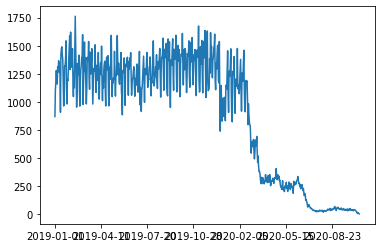

In [9]:
#visualize the data and estimate the date based on the sharp decline in the number of collisions reported
new_collision_data['collision_date']. value_counts().sort_index().plot()